In [1]:
# 1. Import libraries
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import plotly.express as px

# Replace with your own credentials
username = "root"
password = "Deep%401234"
host = "localhost"
database = "superstore"


# 2. Connect to MySQL
engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")

# 3. Load data
customers = pd.read_sql("SELECT * FROM customers", engine)
orders = pd.read_sql("SELECT * FROM orders", engine)
products = pd.read_sql("SELECT * FROM products", engine)
order_details = pd.read_sql("SELECT * FROM order_details", engine)

          category   total_sales
0        Furniture  1.484000e+06
1  Office Supplies  1.438094e+06
2       Technology  1.672308e+06


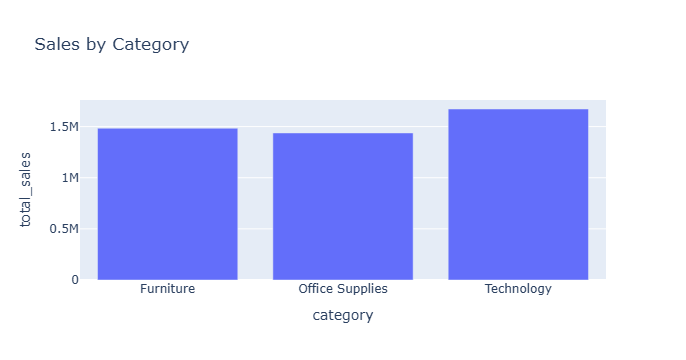

In [2]:
# Total_sales is ploted by product category such as Tech, furniture etc.
query= """
SELECT p.category, SUM(od.sales) AS total_sales
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.category;
"""

df_sales_by_category = pd.read_sql(query, engine)
print(df_sales_by_category)

fig = px.bar(df_sales_by_category, x="category", y="total_sales", title="Sales by Category")
fig.show()

          category  total_profit
0        Furniture    36902.5228
1  Office Supplies   244981.6808
2       Technology   290910.6081


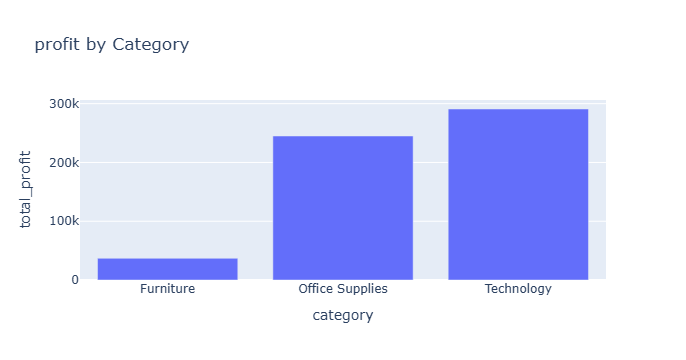

In [3]:
query_2= """
SELECT p.category, SUM(od.profit) AS total_profit
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.category;
"""
df_profit_by_category = pd.read_sql(query_2, engine)
print(df_profit_by_category)


import plotly.express as px

fig = px.bar(df_profit_by_category, x="category", y="total_profit", title="profit by Category")
fig.show()

In [4]:
query_3 = """
SELECT p.category,
       SUM(od.sales) AS total_sales,
       SUM(od.profit) AS total_profit,
       SUM(od.profit)/NULLIF(SUM(od.sales),0) AS profit_margin
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.category;
"""
df_profit_margin = pd.read_sql(query_3, engine)
print(df_profit_margin)

          category   total_sales  total_profit  profit_margin
0        Furniture  1.484000e+06    36902.5228       0.024867
1  Office Supplies  1.438094e+06   244981.6808       0.170352
2       Technology  1.672308e+06   290910.6081       0.173958


In [5]:
query_4 = """
SELECT p.category,
       AVG(od.discount) AS avg_discount,
       SUM(od.quantity) AS total_units,
       SUM(od.sales)/NULLIF(SUM(od.quantity),0) AS avg_price_per_unit
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.category;
"""
df_avg_price_per_unit = pd.read_sql(query_4, engine)
print(df_avg_price_per_unit)

          category  avg_discount  total_units  avg_price_per_unit
0        Furniture      0.173923      16056.0           92.426493
1  Office Supplies      0.157285      45812.0           31.391208
2       Technology      0.132323      13878.0          120.500658


In [6]:
query_5 = """
SELECT
  p.product_id,
  p.product_name,
  p.category,
  SUM(od.quantity) AS total_units,
  SUM(od.sales) AS total_sales,
  SUM(od.profit) AS total_profit,
  SUM(od.sales) - SUM(od.profit) AS total_cost,
  (SUM(od.sales) - SUM(od.profit)) / NULLIF(SUM(od.quantity),0) AS avg_unit_cost,
  SUM(od.sales)/NULLIF(SUM(od.quantity),0) AS avg_unit_price,
  (SUM(od.sales) - SUM(od.profit)) / NULLIF(SUM(od.sales),0) AS cost_share_of_sales,
  SUM(od.profit)/NULLIF(SUM(od.sales),0) AS profit_margin
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.product_id, p.product_name, p.category
ORDER BY total_sales DESC;
"""
df_product_level_aggregates = pd.read_sql(query_5, engine)
print(df_product_level_aggregates.head())

        product_id                                       product_name  \
0  TEC-CO-10004722              Canon imageCLASS 2200 Advanced Copier   
1  OFF-BI-10003527  Fellowes PB500 Electric Punch Plastic Comb Bin...   
2  TEC-MA-10002412  Cisco TelePresence System EX90 Videoconferenci...   
3  FUR-CH-10002024       HON 5400 Series Task Chairs for Big and Tall   
4  OFF-BI-10001359         GBC DocuBind TL300 Electric Binding System   

          category  total_units  total_sales  total_profit  total_cost  \
0       Technology         40.0   123199.654    50399.8680  72799.7860   
1  Office Supplies         62.0    54906.764    15506.0990  39400.6650   
2       Technology         12.0    45276.960    -3622.1584  48899.1184   
3        Furniture         78.0    43741.146        0.0000  43741.1460   
4  Office Supplies         74.0    39646.959     4467.0051  35179.9539   

   avg_unit_cost  avg_unit_price  cost_share_of_sales  profit_margin  
0    1819.994650     3079.991350             

In [7]:
query_6 = """
SELECT
  p.category,
  SUM(od.quantity) AS total_units,
  SUM(od.sales) AS total_sales,
  SUM(od.profit) AS total_profit,
  AVG(od.discount) AS avg_discount,
  SUM(od.sales) - SUM(od.profit) AS total_cost,
  (SUM(od.sales) - SUM(od.profit)) / NULLIF(SUM(od.quantity),0) AS avg_unit_cost,
  SUM(od.profit)/NULLIF(SUM(od.sales),0) AS profit_margin
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.category;
"""
df_category_level_aggregates = pd.read_sql(query_6, engine)
print(df_category_level_aggregates.head())

          category  total_units   total_sales  total_profit  avg_discount  \
0        Furniture      16056.0  1.484000e+06    36902.5228      0.173923   
1  Office Supplies      45812.0  1.438094e+06   244981.6808      0.157285   
2       Technology      13878.0  1.672308e+06   290910.6081      0.132323   

     total_cost  avg_unit_cost  profit_margin  
0  1.447097e+06      90.128130       0.024867  
1  1.193112e+06      26.043664       0.170352  
2  1.381398e+06      99.538660       0.173958  


In [8]:
query_1 = """
SELECT
  DATE_FORMAT(o.order_date, '%%Y-%%m-01') AS month_start,
  SUM(od.sales) AS total_sales
FROM orders o
JOIN order_details od ON o.order_id = od.order_id
WHERE o.order_date IS NOT NULL
GROUP BY month_start
ORDER BY month_start;
"""

df_monthly_sales = pd.read_sql(query_1, engine)
print(df_monthly_sales)

   month_start  total_sales
0   2014-01-01   28473.7950
1   2014-02-01    9039.8120
2   2014-03-01  111382.0490
3   2014-04-01   56590.6950
4   2014-05-01   47296.5670
5   2014-06-01   69190.2676
6   2014-07-01   67892.7630
7   2014-08-01   55818.9385
8   2014-09-01  163554.6908
9   2014-10-01   62906.7630
10  2014-11-01  157257.4567
11  2014-12-01  139091.2605
12  2015-01-01   36348.1556
13  2015-02-01   23902.8110
14  2015-03-01   77452.5120
15  2015-04-01   68390.4585
16  2015-05-01   60263.4065
17  2015-06-01   49594.6020
18  2015-07-01   57530.6450
19  2015-08-01   73796.6522
20  2015-09-01  129191.7880
21  2015-10-01   62809.8235
22  2015-11-01  151945.0735
23  2015-12-01  149839.0412
24  2016-01-01   37085.0110
25  2016-02-01   45957.6350
26  2016-03-01  103431.7350
27  2016-04-01   77500.0790
28  2016-05-01  113975.4780
29  2016-06-01   80689.0740
30  2016-07-01   78523.9530
31  2016-08-01   62230.7243
32  2016-09-01  146820.1149
33  2016-10-01  119375.5450
34  2016-11-01  1588

In [9]:
# Ensure month_start is datetime and sorted
df_monthly_sales['month_start'] = pd.to_datetime(df_monthly_sales['month_start'])
df_monthly_sales = df_monthly_sales.sort_values('month_start').reset_index(drop=True)

# Optional: resample to ensure continuous months (fills missing months with 0)
df_monthly_sales = df_monthly_sales.set_index('month_start').resample('MS').sum().fillna(0).reset_index()

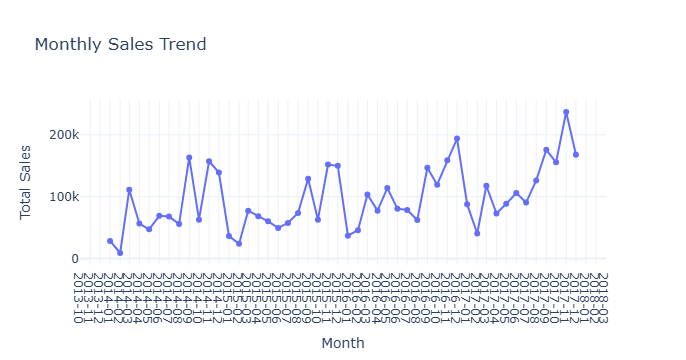

In [10]:
import plotly.express as px

fig = px.line(
    df_monthly_sales,
    x='month_start',
    y='total_sales',
    title='Monthly Sales Trend',
    markers=True,
    labels={'month_start': 'Month', 'total_sales': 'Total Sales'}
)

fig.update_layout(
    xaxis=dict(tickformat='%Y-%m', dtick='M1'),
    template='plotly_white'
)

fig.show()

In [11]:
query_2 = """
SELECT
  od.discount,
  od.profit
FROM order_details od
WHERE od.discount IS NOT NULL AND od.profit IS NOT NULL;
"""

df_discount_profit = pd.read_sql(query_2, engine)
print(df_discount_profit)

       discount    profit
0          0.00   41.9100
1          0.00  219.5800
2          0.00    6.8700
3          0.45 -383.0300
4          0.20    2.5200
...         ...       ...
19983      0.20    4.1028
19984      0.00   15.6332
19985      0.20   19.3932
19986      0.00   13.3200
19987      0.00   72.9480

[19988 rows x 2 columns]


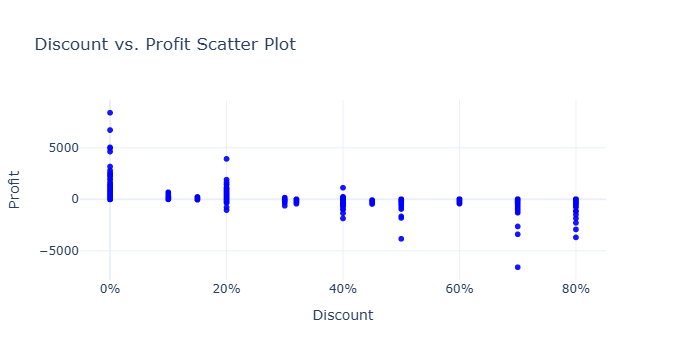

In [12]:
import plotly.express as px

fig = px.scatter(
    df_discount_profit,
    x='discount',
    y='profit',
    title='Discount vs. Profit Scatter Plot',
    labels={'discount': 'Discount', 'profit': 'Profit'},
    opacity=0.7,
    color_discrete_sequence=['blue']
)

fig.update_layout(
    template='plotly_white',
    xaxis=dict(tickformat='.0%', title='Discount'),
    yaxis=dict(title='Profit')
)

fig.show()

In [13]:
query_pareto = """
SELECT
  c.customer_name,
  SUM(od.profit) AS total_profit
FROM order_details od
JOIN customers c ON od.customer_id = c.customer_id
GROUP BY c.customer_name
ORDER BY total_profit DESC;
"""

df_profit_by_customer = pd.read_sql(query_pareto, engine)
print(df_profit_by_customer)

      customer_name  total_profit
0      Tamara Chand    17962.6439
1      Raymond Buch    13952.1859
2      Sanjit Chand    11514.8319
3      Hunter Lopez    11244.8592
4     Adrian Barton    10889.6155
..              ...           ...
788   Henry Goldwyn    -5595.9135
789  Sharelle Roach    -6667.8244
790     Luke Foster    -7167.9470
791  Grant Thornton    -8217.3189
792   Cindy Stewart   -13252.7595

[793 rows x 2 columns]


In [14]:
df = df_profit_by_customer.copy()
df['cumulative_profit'] = df['total_profit'].cumsum()
df['contribution_percent'] = 100 * df['cumulative_profit'] / df['total_profit'].sum()

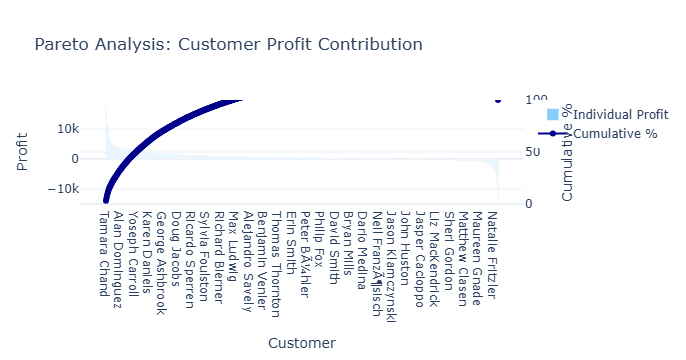

In [15]:
import plotly.graph_objects as go

fig = go.Figure()

# Bar chart for individual profit
fig.add_trace(go.Bar(
    x=df['customer_name'],
    y=df['total_profit'],
    name='Individual Profit',
    marker_color='lightskyblue'
))

# Line chart for cumulative contribution
fig.add_trace(go.Scatter(
    x=df['customer_name'],
    y=df['contribution_percent'],
    name='Cumulative %',
    yaxis='y2',
    mode='lines+markers',
    line=dict(color='darkblue')
))

# Dual axis layout
fig.update_layout(
    title='Pareto Analysis: Customer Profit Contribution',
    xaxis_title='Customer',
    yaxis=dict(title='Profit'),
    yaxis2=dict(title='Cumulative %', overlaying='y', side='right', range=[0, 100]),
    template='plotly_white',
    showlegend=True
)

fig.show()

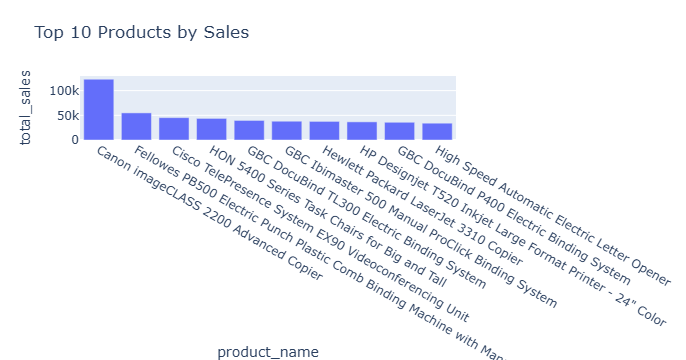

In [16]:
# Top-N Bar ( Top 10 customers )
query_3 = """
SELECT p.product_name, SUM(od.sales) AS total_sales
FROM order_details od
JOIN products p ON od.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_sales DESC
LIMIT 10;
"""

df_top10 = pd.read_sql(query_3, engine)

fig = px.bar(df_top10, x='product_name', y='total_sales', title='Top 10 Products by Sales')

fig.show()